In [26]:
import pandas as pd
import numpy as np;np.random.seed(0)
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import re

df = pd.read_csv('covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [2]:
def clean_1(s):
    s = s.replace('ðŸž', "")
    s = s.replace('ðŸ¤·â€â™', "")
    s = s.replace("ðŸ”´", "")
    s = s.replace("€™", "")
    s = s.replace("ƒ¼", "")
    s = s.replace("â€˜", "")
    s = s.replace("â€™", "")
    s = s.replace("ðŸ˜˜", "")
    s = s.replace("ðŸ”Š", "")
    s = s.replace("&amp;", "&")
    s = s.replace("ðŸ§©", "")
    s = s.replace(":", "")
    s = s.replace(";", "")
    s = s.replace("'", "")
    s = s.replace("|", "")
    s = s.replace("//", "")
    s = s.replace('📍',"")
    s = s.replace('🏫',"")
    s = s.replace('💯',"")
    s = s.replace('🧵',"")
    s = s.replace('🔊',"")
    s = s.replace("●", "")
    s = s.replace("❤️", "")
    s = s.replace("🙃", "")
    s = s.replace("🤔", "")
    s = s.replace("😉", "")
    s = s.replace("⬇️", "")
    s = s.replace("🔴", "")
    s = s.replace("🤷‍", "")
    s = s.replace("🐞", "")
    s = s.replace("🚨", "")
    s = s.replace("🙌", "")
    s = s.replace("👑", "")
    s = s.replace("🔥", "")
    s = s.replace("👇", "")
    return str(s)
df["text_clean"] = ''
for i, row in df.iterrows():
    df.at[i, "text_clean"] = clean_1(row.text)


In [3]:
to_drop = ['user_created','user_description','user_verified','text','is_retweet']


df.drop(to_drop, inplace=True, axis=1)

In [4]:
df.head()

,user_name,user_location,user_followers,user_friends,user_favourites,date,hashtags,source,text_clean
0,ᏉᎥ☻լꂅϮ,astroworld,624,950,18775,2020-07-25 12:27:21,NaN,Twitter for iPhone,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,"New York, NY",2253,1677,24,2020-07-25 12:27:17,NaN,Twitter for Android,Hey @Yankees @YankeesPR and @MLB - wouldnt it ...
2,Time4fisticuffs,"Pewee Valley, KY",9275,9525,7254,2020-07-25 12:27:14,['COVID19'],Twitter for Android,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,Stuck in the Middle,197,987,1488,2020-07-25 12:27:10,['COVID19'],Twitter for iPhone,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,Jammu and Kashmir,101009,168,101,2020-07-25 12:27:08,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,25 July Media Bulletin on Novel #CoronaVirusU...


In [5]:
df.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [6]:
df.describe(include=np.object).transpose()

,count,unique,top,freq
user_name,74436,44853,GlobalPandemic.NET,312
user_location,59218,14622,India,1496
date,74436,56546,2020-07-29 16:30:00,26
hashtags,53002,23445,['COVID19'],16004
source,74424,450,Twitter Web App,22974
text_clean,74436,74312,Greenland has no active cases of the novel cor...,6


In [22]:
print(df.corr(method='pearson'))

                 user_followers  user_friends  user_favourites
user_followers         1.000000     -0.002722        -0.028724
user_friends          -0.002722      1.000000         0.207825
user_favourites       -0.028724      0.207825         1.000000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


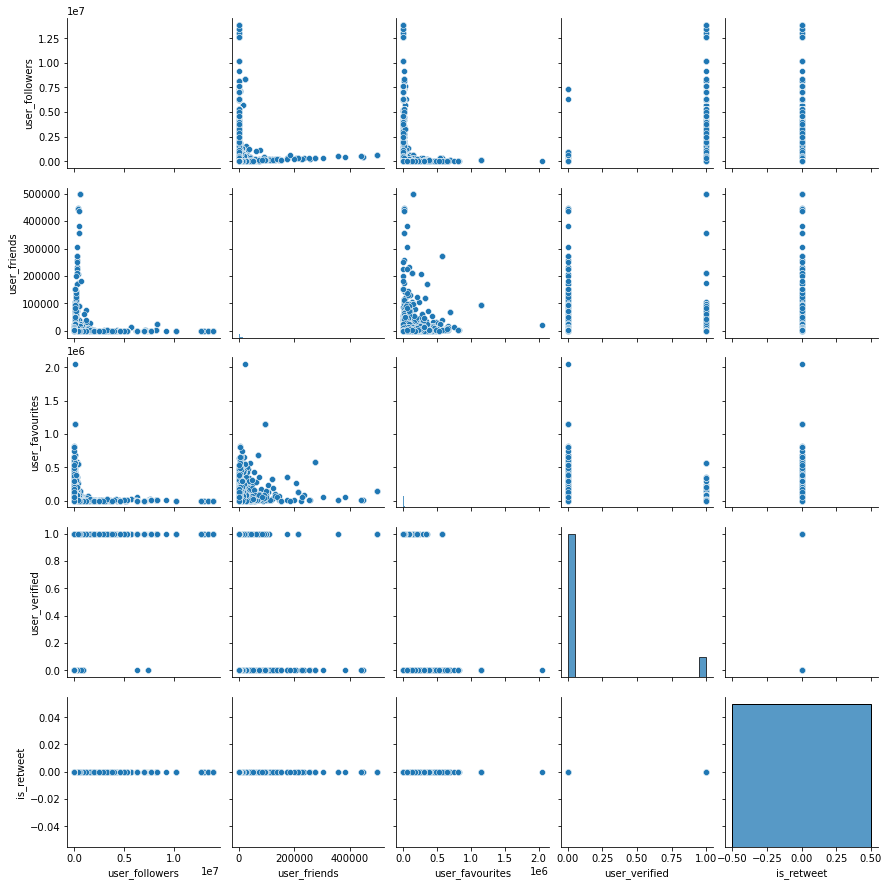

In [28]:
sns.pairplot(df)
plt.show()

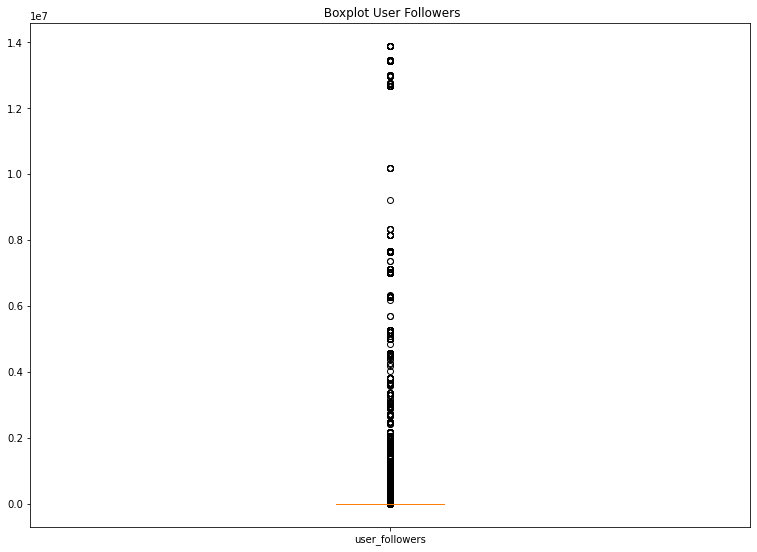

In [21]:
columna_1 = df["user_followers"]
myData = [columna_1]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title(" Boxplot User Followers") 
ax.set_xticklabels(['user_followers'])
plt.show()

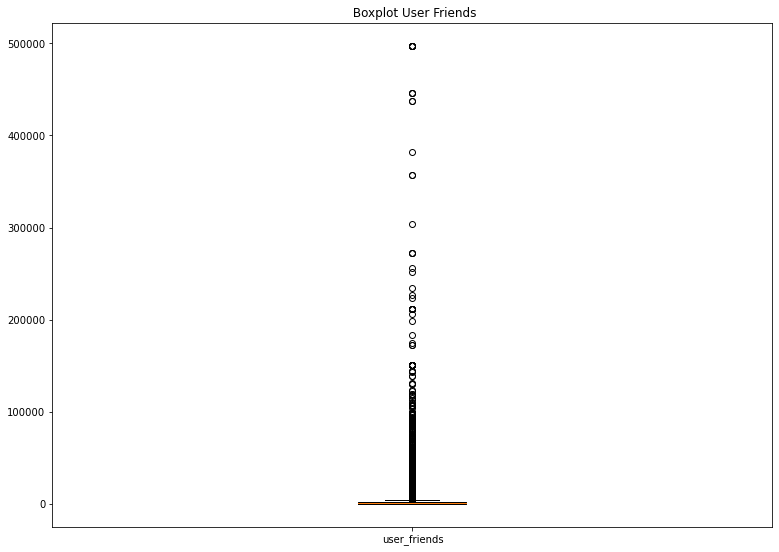

In [20]:
columna_2 = df["user_friends"]
myData = [columna_2]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title(" Boxplot User Friends") 
ax.set_xticklabels(['user_friends'])
plt.show()

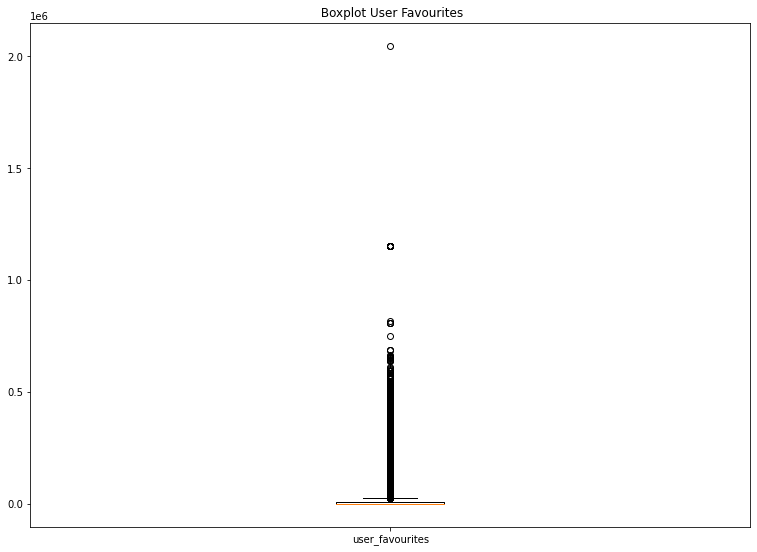

In [19]:
columna_3 = df["user_favourites"]
myData = [columna_3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title(" Boxplot User Favourites") 
ax.set_xticklabels(['user_favourites'])
plt.show()

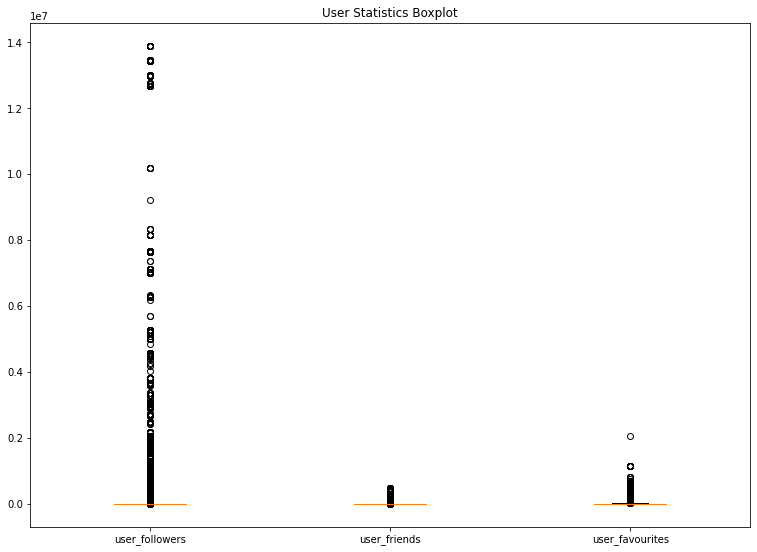

In [18]:
#Boxplot general
columna_1 = df["user_followers"]
columna_2 = df["user_friends"]
columna_3 = df["user_favourites"]
myData = [columna_1,columna_2,columna_3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title("User Statistics Boxplot") 
ax.set_xticklabels(['user_followers', 'user_friends',  
                    'user_favourites']) 

plt.show()

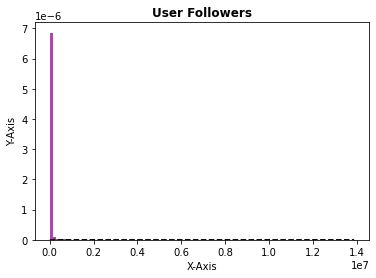

In [13]:
#Histograma user_followers
np.random.seed(10**7) 
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000) 
   
num_bins = 100
   
n, bins, patches = plt.hist(df["user_followers"], num_bins,  
                            density = 1,  
                            color ='purple', 
                            alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
  
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis') 
  
plt.title('User Followers', 
          fontweight ="bold") 
  
plt.show() 

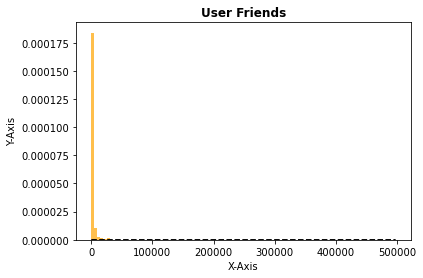

In [14]:
#Histograma user_friends
np.random.seed(10**7) 
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000) 
   
num_bins = 100
   
n, bins, patches = plt.hist(df["user_friends"], num_bins,  
                            density = 1,  
                            color ='orange', 
                            alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
  
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis') 
  
plt.title('User Friends', 
          fontweight ="bold") 
  
plt.show() 

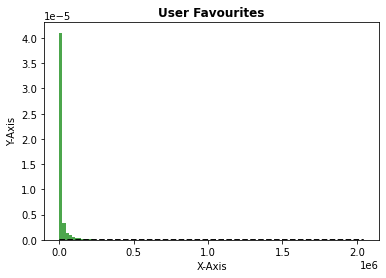

In [15]:
#Histograma user_favourites
np.random.seed(10**7) 
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000) 
   
num_bins = 100
   
n, bins, patches = plt.hist(df["user_favourites"], num_bins,  
                            density = 1,  
                            color ='green', 
                            alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
  
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis') 
  
plt.title('User Favourites', 
          fontweight ="bold") 
  
plt.show() 